# Brief on Quantum Errors
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

Loss of coherence occur during either quntum communication due to noise in channel , In the communication two parties are involved i.e sender and reciever . Another way to loss of coherence is due to computation where only one party is involve where do the manupulation using uitary transformation and extract some part of information using measurement. 

Coherence can be preserved for short channel communication or isolated the system from the environment.

Here we talk about the unwanted disturbance in channel subject to coherence is preserved and how to correct the code with the help of  different encoding scheme.

## Repetiton Code 

In daily life if someone is speaking something and due to disturbance we cannot listen what we do ?\
We told him\her to say is again or repeat. Thats the same thought behind this code and one of the basic principle for encoding.\
Or in quantum terms we map the qubit space to higher dimentional Hilbert space.

Arbitrary State : $\ket\psi = \alpha\ket{0} + \beta\ket{1}$

We convert this above state i.e physical state into logical stae (below) :
  <li> <font color="blue"> $ \ket\psi_{l} = \alpha\ket{000} + \beta\ket{111} $<font> </li>    \
<font color="black"> With the help of Qiskit we built the circuit . Run the below code :<font>
 

 !! WE MAKE LOGICAL STATE WITH THE HELP OF ENTANGLEMENT !!


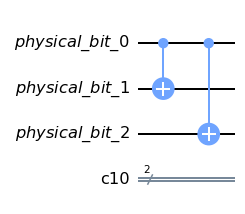

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram

print("==========================================================")
print(" !! WE MAKE LOGICAL STATE WITH THE HELP OF ENTANGLEMENT !!")
print("==========================================================")
qr1 = QuantumRegister(3,'physical_bit')
cr1= ClassicalRegister(2)
circuit1 = QuantumCircuit(qr1,cr1)
%matplotlib inline 
circuit1.cx(qr1[0],qr1[1])
circuit1.cx(qr1[0],qr1[2])
circuit1.draw(output='mpl')


## We then introduce the error randomly and with the help of ancilla qubit we detect the error
### To Measure the Syndrome we use ancilla qubit 

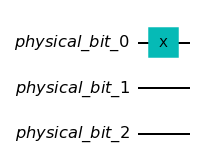

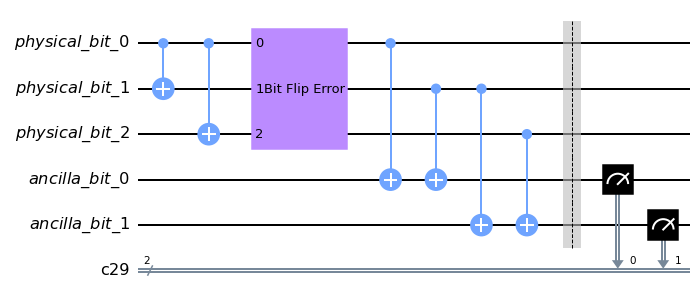

Calculated SYNDROME IS :  dict_keys(['01'])
--------------------------------------------------|
Ancilla_bit_1 -|- Ancilla_bit_0-|-    Error      -|
--------------------------------------------------|
     0         |        0       |   No Error      |
     1         |        0       |  Physical_bit_2 |
     0         |        1       |  Physical_bit_0 |
     1         |        1       |  Physical_bit_1 |
--------------------------------------------------|
****Error in Physical_bit_0****


In [33]:

#display(result.get_counts())

%matplotlib inline 

qr2 = QuantumRegister(3,'physical_bit')
ar2 = QuantumRegister(2,'ancilla_bit')
cr2 = ClassicalRegister(2)

circuit2 = QuantumCircuit(qr2,ar2,cr2)

circuit2.cx(qr2[0],qr2[1])
circuit2.cx(qr2[0],qr2[2])

def error_model():
    output =0
    error_model = QuantumCircuit(qr2)
    output = np.random.randint(3)
    error_model.x(qr2[output])
    #print(output)
    display(error_model.draw(output='mpl'))
    error_gate = error_model.to_gate()
    error_gate.name = "Bit Flip Error"
    return error_gate

error_gate_model = error_model() 

circuit2.append(error_gate_model,range(3))

# ======== We need to add Ancilla bits to measure the syndrome ======= #

circuit2.cx(qr2[0],ar2[0])
circuit2.cx(qr2[1],ar2[0])
circuit2.cx(qr2[1],ar2[1])
circuit2.cx(qr2[2],ar2[1])

circuit2.barrier()

## ======Measure from the ancilla bits =========== ### 

circuit2.measure(ar2[0],cr2[0])
circuit2.measure(ar2[1],cr2[1])


display(circuit2.draw(output='mpl'))
#IBMQ.load_account()
#provider = IBMQ.get_provider('ibm-q')
#backend = provider.get_backend('ibmq_armonk')    
#job = execute(circuit2,backend,shots=1)
#print(job_monitor(job))
#result= job.result()
aer_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit2 = transpile(circuit2, aer_sim)
qobj = assemble(transpiled_circuit2,shots=1)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
#display(plot_histogram(answer))
print("=============================================")
print("Calculated SYNDROME IS : ",answer.keys())
print("=============================================")
#print(answer)
print("--------------------------------------------------|")
print("Ancilla_bit_1 -|- Ancilla_bit_0-|-    Error      -|")
print("--------------------------------------------------|")
print("     0         |        0       |   No Error      |")
print("     1         |        0       |  Physical_bit_2 |")
print("     0         |        1       |  Physical_bit_0 |")
print("     1         |        1       |  Physical_bit_1 |")
print("--------------------------------------------------|")

circuit2.barrier()

if '00' in answer.keys() :
    print("****No error in the circuit****")
    
elif '01' in answer.keys() :
    print("****Error in Physical_bit_0****")
    correct =0
elif '10' in answer.keys() :
    print("****Error in Physical_bit_2****")
    correct = 2
elif '11' in answer.keys() :
    print("****Error in Physical_bit_1****")
    correct =3
   
#    if i == 1:
#        print(counts)
#        print(" We need to correct the circuit as output is flipped")
##        print(" Circuit : Before the error correction ")
#        display(circuit2.draw(output="mpl"))
#        print("We need to flip the qubit state")
#        print("Circuit :After correction ")
#        circuit2.x(0)
#        circuit2.barrier()
        
#        display(circuit2.draw(output='mpl'))
        
        
#    else :
 #       print(counts)
  #      print("Output is correct " )


## We need to correct the error by applying the flip gate(X gate) to the affected Qubit
    

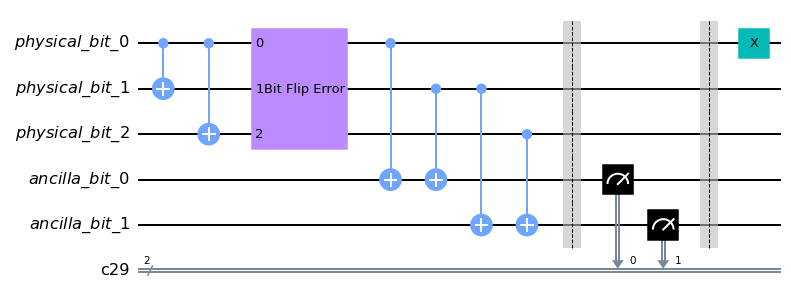

In [34]:
circuit2.x(qr2[correct]) 
display(circuit2.draw(output='mpl'))